## ANALISIS TRANSAKSI E-COMMERCE

### Analisis transaksi e-commerce bertujuan untuk mendapatkan gambaran tentang arus data transaksi dengan cara mengolah dan memproses data mentah untuk mendapatkan informasi yang diperlukan dalam pengambilan keputusan.

### Langkah pertama yang dilakukan adalah mengimport library yang akan membantu setiap proses mulai dari memuat data hingga menampilkan visualisasi.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Memuat data yang akan digunakan, lalu ditampilkan beberapa data teratas serta informasi mengenai setiap detail data tersebut

In [2]:
# tabel orders berisi tentang informasi transaksi
orders = pd.read_csv(r"G:\DATA ANALYTICS STUFF\DATASET\data\order_details.csv")

#tabel users berisi tentang informasi semua pihak yang terlibat dalam e-commerce tersebut
users = pd.read_csv(r"G:\DATA ANALYTICS STUFF\DATASET\data\users.csv")

#tabel products berisi tentang informasi detail produk
products = pd.read_csv(r"G:\DATA ANALYTICS STUFF\DATASET\data\products.csv")

#tabel details berisi tentang informasi detail order
details = pd.read_csv(r"G:\DATA ANALYTICS STUFF\DATASET\data\details.csv")

### DATA PREPARATION & DATA CLEANSING

In [3]:
orders.head()

,order_id,seller_id,buyer_id,kodepos,subtotal,discount,total,created_at,paid_at,delivery_at
0,3,5,4769,32610,"900,000",0,900000,01-06-19,04-06-19,12-06-19
1,5,23,4276,2674,"220,000",0,220000,02-04-19,05-04-19,09-04-19
2,8,4,14110,48577,"1,248,000",0,1248000,02-08-19,13-08-19,20-08-19
3,19,5,3831,91235,"1,074,000",0,1074000,16-05-20,NaN,NaN
4,31,46,5318,96740,"253,000",0,253000,12-03-19,17-03-19,20-03-19


In [4]:
orders.buyer_id.nunique()

17877

In [5]:
orders.buyer_id.min()

1

In [6]:
orders.buyer_id.max()

17936

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74874 entries, 0 to 74873
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     74874 non-null  int64 
 1   seller_id    74874 non-null  int64 
 2   buyer_id     74874 non-null  int64 
 3   kodepos      74874 non-null  int64 
 4    subtotal    74874 non-null  object
 5   discount     74874 non-null  int64 
 6   total        74874 non-null  int64 
 7   created_at   74874 non-null  object
 8   paid_at      69828 non-null  object
 9   delivery_at  65084 non-null  object
dtypes: int64(6), object(4)
memory usage: 5.7+ MB


In [8]:
users.tail()

,user_id,nama_user,kodepos,email,Unnamed: 4,Unnamed: 5,Unnamed: 6
17931,17932,Diana Nuraini,78070,tugimanutami@pt.org,NaN,NaN,NaN
17932,17933,Kamal Sirait,92194,luwar13@perum.sch.id,NaN,NaN,NaN
17933,17934,Cut Tania Simanjuntak,77401,iswahyudirudi@yahoo.com,NaN,NaN,NaN
17934,17935,"R.M. Gamblang Pratiwi, S.E.I",71242,firgantoroyuni@gmail.com,NaN,NaN,NaN
17935,17936,Wisnu Yulianti,17513,ywibisono@ud.go.id,NaN,NaN,NaN


In [9]:
users.user_id.nunique()

17936

#### Saat dilakukan pengecekan, ternyata ada hal yang tidak sinkron antara dua tabel yaitu tabel orders dan users. Jumlah users yang terdaftar adalah 17.936, sedangkan akumulasi jumlah seller dan buyer(semua seller juga termasuk buyer) hanya 17.877. 

In [10]:
user = users[['user_id','nama_user']]
user

,user_id,nama_user
0,1,"Ir. Paris Siregar, S.Sos"
1,2,Oliva Zulkarnain
2,3,Latika Mustofa
3,4,Elvina Rahmawati
4,5,Tedi Irawan
...,...,...
17931,17932,Diana Nuraini
17932,17933,Kamal Sirait
17933,17934,Cut Tania Simanjuntak
17934,17935,"R.M. Gamblang Pratiwi, S.E.I"


In [11]:
buy = orders[['buyer_id','total']]
buy

,buyer_id,total
0,4769,900000
1,4276,220000
2,14110,1248000
3,3831,1074000
4,5318,253000
...,...,...
74869,9092,1717000
74870,8598,2170000
74871,4439,78000
74872,1220,382000


In [12]:
buser = pd.merge(buy,user,how='outer',left_on='buyer_id',right_on='user_id')
ac = buser.loc[buser['buyer_id'].isnull()]
ac.user_id.nunique()

59

#### Setelah dilakukan cross-check ternyata ada 59 user yang terdaftar ke dalam tabel users tetapi tidak melakukan transaksi. Jadi setelah memperhitungkan hal tersebut, maka jumlah users di kedua tabel menjadi sama yaitu 17.936.

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17936 entries, 0 to 17935
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     17936 non-null  int64  
 1   nama_user   17936 non-null  object 
 2   kodepos     17936 non-null  int64  
 3   email       17936 non-null  object 
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(3), int64(2), object(2)
memory usage: 981.0+ KB


In [14]:
products.head()

,product_id,desc_product,category,base_price
0,1,OLIVIA KULOT OLV03,Pakaian Wanita,110000
1,2,BLANIK BLOUSE BL304,Pakaian Wanita,100000
2,3,NEW DAY BY RIX DRESS ND01,Pakaian Wanita,85000
3,4,BLANIK BLOUSE BL023,Pakaian Wanita,85000
4,5,BLANIK BLAZER BL031,Pakaian Wanita,99000


In [15]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1145 non-null   int64 
 1   desc_product  1145 non-null   object
 2   category      1145 non-null   object
 3   base_price    1145 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 35.9+ KB


In [16]:
details.head()

,order_detail_id,order_id,product_id,price,quantity
0,5,3,907,25000,36
1,9,5,562,10000,22
2,15,8,645,39000,32
3,48,19,287,22000,12
4,49,19,201,26000,27


In [17]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187452 entries, 0 to 187451
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   order_detail_id  187452 non-null  int64
 1   order_id         187452 non-null  int64
 2   product_id       187452 non-null  int64
 3   price            187452 non-null  int64
 4   quantity         187452 non-null  int64
dtypes: int64(5)
memory usage: 7.2 MB


In [18]:
orders.columns

Index(['order_id', 'seller_id', 'buyer_id', 'kodepos', ' subtotal ',
       'discount', 'total', 'created_at', 'paid_at', 'delivery_at'],
      dtype='object')

### Tahap selanjutnya adalah melakukan pembersihan dan koreksi pada data-data bermasalah, seperti adanya baris yang kosong maupun adanya kelebihan kolom. 

#### Pada tabel orders, kolom 'subtotal' tipe data yang seharusnya bernilai integer(bilangan) justru diidentifikasi sebagai object(teks). Jika tidak diubah, maka kolom tersebut tidak bisa berfungsi dengan optimal, sebagaimana seharusnya peruntukannya.
#### Selain itu, ada beberapa data yang kosong yang harus diperlakukan khusus atau bisa dibuang begitu saja, namun untuk kali ini, data tersebut hanya akan ditepikan saja.

In [19]:
# Mengganti nama kolom ' subtotal ' menjadi 'subtotal'
orders.rename(columns={' subtotal ' : 'subtotal'}, inplace=True)

In [20]:
# Menemukan transaksi yang tidak selesai, menggunakan syarat kolom 'paid_at' atau 'delivery_at' adalah NaN
unfinished_transactions = orders.loc[(orders['paid_at'].isnull()) | (orders['delivery_at'].isnull())].copy()

In [21]:
# Mengganti format data 'created_at', 'paid_at', dan 'delivery_at' menjadi format date & time
orders['created_at'] = pd.to_datetime(orders['created_at'], format='%d-%m-%y')
orders['paid_at'] = pd.to_datetime(orders['paid_at'],format='%d-%m-%y')
orders['delivery_at'] = pd.to_datetime(orders['delivery_at'],format='%d-%m-%y')

In [22]:
# Mengganti tipe data di kolom 'subtotal'
orders['subtotal'] = orders['subtotal'].str.replace(',','').astype('int')

In [23]:
# Membuang data kosong
orders = orders.dropna()

In [24]:
orders.head()

,order_id,seller_id,buyer_id,kodepos,subtotal,discount,total,created_at,paid_at,delivery_at
0,3,5,4769,32610,900000,0,900000,2019-06-01,2019-06-04,2019-06-12
1,5,23,4276,2674,220000,0,220000,2019-04-02,2019-04-05,2019-04-09
2,8,4,14110,48577,1248000,0,1248000,2019-08-02,2019-08-13,2019-08-20
4,31,46,5318,96740,253000,0,253000,2019-03-12,2019-03-17,2019-03-20
5,33,68,16359,97275,160000,0,160000,2019-07-09,2019-07-14,2019-07-14


In [25]:
# Jarak waktu dari buyer membuat pesanan sampai melakukan pembayaran
paid_min_created = orders['paid_at'] - orders['created_at']
paid_min_created

0        3 days
1        3 days
2       11 days
4        5 days
5        5 days
          ...  
74869    6 days
74870   13 days
74871    2 days
74872    6 days
74873   11 days
Length: 65084, dtype: timedelta64[ns]

In [26]:
# Jarak waktu dari buyer melakukan pembayaran sampai seller mengirimkan pesanan buyer
delivery_min_paid = orders['delivery_at'] - orders['paid_at']
delivery_min_paid

0        8 days
1        4 days
2        7 days
4        3 days
5        0 days
          ...  
74869    2 days
74870    4 days
74871   10 days
74872   12 days
74873    0 days
Length: 65084, dtype: timedelta64[ns]

In [27]:
unfinished_transactions

,order_id,seller_id,buyer_id,kodepos,subtotal,discount,total,created_at,paid_at,delivery_at
3,19,5,3831,91235,"1,074,000",0,1074000,16-05-20,NaN,NaN
21,135,51,2716,12436,"5,156,000",0,5156000,05-11-19,19-11-19,NaN
47,320,16,17885,24758,"57,000",0,57000,07-12-19,NaN,NaN
53,350,14,3382,16833,"1,170,000",0,1170000,08-08-19,NaN,NaN
91,590,6,15737,24121,"346,000",0,346000,15-12-19,19-12-19,NaN
...,...,...,...,...,...,...,...,...,...,...
74847,498618,5,8179,83596,"49,000",0,49000,09-11-19,NaN,NaN
74851,498639,4,7281,94569,"1,386,000",0,1386000,01-04-20,NaN,NaN
74852,498643,36,7522,53936,"2,230,000",0,2230000,30-04-20,10-05-20,NaN
74858,498697,11,16638,37064,"943,000",0,943000,14-05-20,NaN,NaN


#### Pada tabel users, ditemukan ada 3 kolom yang keseluruhannya kosong. Ketiga kolom tersebut akan dibuang.

In [28]:
users = users.dropna(axis=1,how='all')

In [29]:
# Mengganti tipe data di kolom 'kodepos' menjadi string
users['kodepos'] = users['kodepos'].astype(str) 
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17936 entries, 0 to 17935
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    17936 non-null  int64 
 1   nama_user  17936 non-null  object
 2   kodepos    17936 non-null  object
 3   email      17936 non-null  object
dtypes: int64(1), object(3)
memory usage: 560.6+ KB


### EXPLORATORY DATA ANALYSIS

In [30]:
orders.describe()

,order_id,seller_id,buyer_id,kodepos,subtotal,discount,total
count,65084.000000,65084.000000,65084.000000,65084.000000,6.508400e+04,6.508400e+04,6.508400e+04
mean,249789.896334,34.978735,8999.543313,50144.138805,2.007402e+06,1.615752e+04,1.989260e+06
std,144189.514310,19.893624,5166.689727,28890.432525,2.606921e+06,1.069261e+05,2.584983e+06
min,3.000000,1.000000,1.000000,0.000000,2.000000e+03,0.000000e+00,1.700000e+03
25%,124372.500000,18.000000,4536.000000,25162.000000,3.420000e+05,0.000000e+00,3.390000e+05
50%,250423.500000,35.000000,9023.500000,50001.000000,1.048000e+06,0.000000e+00,1.036000e+06
75%,374144.750000,52.000000,13479.000000,75260.000000,2.664000e+06,0.000000e+00,2.640000e+06
max,498783.000000,69.000000,17936.000000,99997.000000,3.611400e+07,3.880500e+06,3.611400e+07


In [31]:
paid_min_created.describe()

count                        65084
mean     7 days 11:34:39.995083277
std      4 days 00:41:03.235166622
min                1 days 00:00:00
25%                4 days 00:00:00
50%                7 days 00:00:00
75%               11 days 00:00:00
max               14 days 00:00:00
dtype: object

##### Dari eksplorasi data jarak waktu antara pembuatan pesanan sampai pesanan oleh buyer, rata-rata waktu yang dibutuhkan kurang lebih 7 hari, dengan waktu paling singkat adalah 1 hari dan paling lama bisa sampai 14 hari.

In [32]:
delivery_min_paid.describe()

count                        65084
mean     6 days 13:54:08.650974125
std      4 days 03:19:44.629329779
min                0 days 00:00:00
25%                3 days 00:00:00
50%                7 days 00:00:00
75%               10 days 00:00:00
max               14 days 00:00:00
dtype: object

##### Sedangkan melihat data di atas, respon seller sedikit lebih baik dengan rata-rata pemrosesan pesanan hingga pesanan siap dikirimkan rata-rata waktu yang dibutuhkan kurang lebih 6 hari, dengan respon paling singkat tidak sampai 1 hari dan paling lama 14 hari

#### Pada tabel users terdiri dari user yang terdaftar sebagai penjual(seller) dan pembeli(buyer), namun semuanya tercampur dan tidak dipisah. Hal ini tentu akan menyulitkan untuk mendapatkan detail seller dan buyer secara terperinci. Oleh karena itu, perlu dibuatkan tabel yang terpisah untuk data rinci tentang seller dan buyer ini.

#### Setelah diamati, id untuk seller memiliki digit yang kecil berkisar 1-2 digit saja, sehingga bisa diasumsikan bahwa tidak sampai ratusan user yang terdaftar sebagai seller. Nilai maksimal dari seller_id hanya 69 saja.

In [33]:
# Mengidentifikasi apakah ada seller yang termasuk buyer juga
seller_and_buyer = orders.loc[orders['buyer_id'].isin(orders['seller_id'])]
seller_and_buyer

,order_id,seller_id,buyer_id,kodepos,subtotal,discount,total,created_at,paid_at,delivery_at
94,625,3,16,76356,72000,0,72000,2019-12-08,2019-12-13,2019-12-18
1152,7658,8,49,45037,328000,0,328000,2019-03-25,2019-04-04,2019-04-05
1326,8682,47,43,83422,2142000,0,2142000,2020-02-26,2020-03-10,2020-03-21
1398,9152,30,49,12064,144000,0,144000,2019-06-24,2019-07-02,2019-07-09
1875,12307,8,33,85389,2184000,0,2184000,2019-10-10,2019-10-15,2019-10-22
...,...,...,...,...,...,...,...,...,...,...
72967,486179,40,9,55836,2278000,0,2278000,2019-12-03,2019-12-10,2019-12-22
73356,488645,24,51,60569,637000,0,637000,2020-05-09,2020-05-13,2020-05-21
73876,492180,29,45,89002,174000,0,174000,2020-01-20,2020-01-31,2020-02-06
74182,494281,17,56,38682,2000000,0,2000000,2019-02-27,2019-03-12,2019-03-15


In [34]:
# Menghitung frekuensi transaksi oleh setiap seller
seller_freq = pd.DataFrame(orders.groupby('seller_id')['total'].count())
seller_freq

,total
seller_id,
1,955
2,899
3,934
4,971
5,902
...,...
65,949
66,911
67,964


In [35]:
# Menghitung jumlah pendapatan yang didapat oleh setiap seller
seller_rev = pd.DataFrame(orders.groupby('seller_id')['total'].sum())
seller_rev

,total
seller_id,
1,1922932250
2,1752253050
3,1736000250
4,2003699050
5,1711936400
...,...
65,1852936850
66,1758176700
67,1997343250


In [36]:
seller = pd.merge(seller_freq,seller_rev,how='outer',right_on='seller_id',left_on='seller_id')
seller = seller.rename(columns={'total_x' : 'frekuensi','total_y' : 'jumlah'})
seller

,frekuensi,jumlah
seller_id,,
1,955,1922932250
2,899,1752253050
3,934,1736000250
4,971,2003699050
5,902,1711936400
...,...,...
65,949,1852936850
66,911,1758176700
67,964,1997343250


In [37]:
# Memberikan rincian informasi penjual berdasarkan frekuensi transaksi
seller_details = pd.merge(users,seller,how='inner',right_on='seller_id',left_on='user_id')
seller_details.sort_values(by='frekuensi',ascending=False)

,user_id,nama_user,kodepos,email,frekuensi,jumlah
25,26,"Gaman Prasetya, S.E.I",63412,oni60@gmail.com,1024,1978047700
41,42,Oliva Wahyudin,83572,yunizulaika@ud.net.id,1006,1960959800
51,52,Puput Usada,49874,gwacana@gmail.com,996,1960839400
62,63,Nadine Zulkarnain,49647,nyomanwahyuni@yahoo.com,994,1959929050
40,41,Kartika Thamrin,93826,icha73@gmail.com,986,2005667600
...,...,...,...,...,...,...
1,2,Oliva Zulkarnain,37034,permadiputri@pt.mil.id,899,1752253050
60,61,Nyoman Nasyidah,22979,kwasita@gmail.com,897,1973766700
45,46,Eja Tarihoran,77851,imarpaung@ud.go.id,895,1792933500
31,32,Samiah Maulana,69802,astutinasab@gmail.com,892,1626789650


In [38]:
# Memberikan rincian informasi penjual berdasarkan total pendapatan yang diterima
seller_details = pd.merge(users,seller,how='inner',right_on='seller_id',left_on='user_id')
seller_details.sort_values(by='jumlah',ascending=False)

,user_id,nama_user,kodepos,email,frekuensi,jumlah
39,40,R.A. Rachel Iswahyudi,57543,hjailani@hotmail.com,970,2132043900
23,24,Purwa Saefullah,23093,egagunarto@yahoo.com,959,2027621500
13,14,Gasti Natsir,25835,purnawativirman@hotmail.com,952,2022790150
20,21,"Novi Situmorang, S.Farm",74053,onipradipta@pd.go.id,985,2022151450
5,6,Ir. Hartaka Susanti,6391,siregarfebi@perum.int,968,2009307700
...,...,...,...,...,...,...
26,27,Bahuwirya Haryanto,38480,esiregar@gmail.com,916,1731774550
4,5,Tedi Irawan,39756,latuponodaliono@hotmail.com,902,1711936400
35,36,Ratih Wahyudin,82917,uprasetya@yahoo.com,932,1664083350
31,32,Samiah Maulana,69802,astutinasab@gmail.com,892,1626789650


In [39]:
# Menghitung frekuensi transaksi yang dilakukan oleh pembeli
buyer_freq = pd.DataFrame(orders.groupby('buyer_id')['total'].count())
buyer_freq

,total
buyer_id,
1,6
2,1
3,3
4,1
5,1
...,...
17932,3
17933,3
17934,7


In [40]:
# Menghitung total transaksi yang dilakukan oleh pembeli
buyer_exp = pd.DataFrame(orders.groupby('buyer_id')['total'].sum())
buyer_exp

,total
buyer_id,
1,20096500
2,143000
3,2839000
4,56000
5,1071000
...,...
17932,4326000
17933,7175400
17934,21667000


In [41]:
buyer = pd.merge(buyer_freq,buyer_exp,how='outer',left_on='buyer_id',right_on='buyer_id')
buyer = buyer.rename(columns={'total_x' : 'frekuensi','total_y' : 'jumlah'})
buyer

,frekuensi,jumlah
buyer_id,,
1,6,20096500
2,1,143000
3,3,2839000
4,1,56000
5,1,1071000
...,...,...
17932,3,4326000
17933,3,7175400
17934,7,21667000


In [42]:
# Memberikan rincian informasi pembeli berdasarkan frekuensi transaksi yang dilakukan
buyer_details = pd.merge(users,buyer,how="inner",left_on='user_id',right_on='buyer_id')
buyer_details.sort_values(by='frekuensi', ascending=False)

,user_id,nama_user,kodepos,email,frekuensi,jumlah
12328,12476,Yessi Wibisono,16556,parmanwaskita@gmail.com,12,39149000
14009,14172,"Ophelia Oktaviani, S.H.",73282,mutiawidodo@ud.go.id,11,11502000
7454,7543,Laras Puspasari,24163,rahmat51@pd.mil.id,11,22681000
17316,17523,"T. Gaduh Widiastuti, S.Kom",88883,nababannajib@cv.biz.id,11,20049800
1234,1251,Septi Sinaga,61651,namagakayla@gmail.com,11,18832000
...,...,...,...,...,...,...
11447,11586,Salimah Siregar,93381,bakionozulkarnain@gmail.com,1,4908000
6379,6457,Victoria Kuswoyo,78104,endah43@cv.desa.id,1,638000
4864,4926,"Drs. Ade Hakim, M.Kom.",94753,cakrabirawa78@perum.com,1,1089000
11446,11585,"Vino Oktaviani, S.E.",7168,luwes65@pd.org,1,6576000


In [43]:
# Memberikan rincian informasi pembeli berdasarkan jumlah uang dalam transaksi
buyer_details = pd.merge(users,buyer,how="inner",left_on='user_id',right_on='buyer_id')
buyer_details.sort_values(by='jumlah', ascending=False)

,user_id,nama_user,kodepos,email,frekuensi,jumlah
14246,14411,Jaga Puspasari,24303,pratamacawisadi@yahoo.com,7,54102250
11007,11140,"R.A. Yulia Padmasari, S.I.Kom",65882,safitriunggul@pt.co.id,7,49071200
2873,2908,"Septi Melani, S.Ked",68589,yuniaraurora@gmail.com,6,49033000
10228,10355,Kartika Habibi,869,siregarbakti@pd.gov,4,48253000
15997,16184,Niyaga Mangunsong,65980,izulaika@pd.or.id,6,43436000
...,...,...,...,...,...,...
15175,15348,"dr. Widya Nababan, M.Pd",14491,jono28@yahoo.com,1,6000
3851,3900,Amelia Santoso,38791,ajionohidayanto@gmail.com,1,4000
16652,16847,Maras Rajasa,32786,prayogaradika@pd.sch.id,1,4000
2942,2977,"R.M. Erik Maryadi, M.Pd",89007,rosmanmayasari@hotmail.com,1,4000


### VISUALIZATION

In [44]:
import matplotlib.pyplot as plt

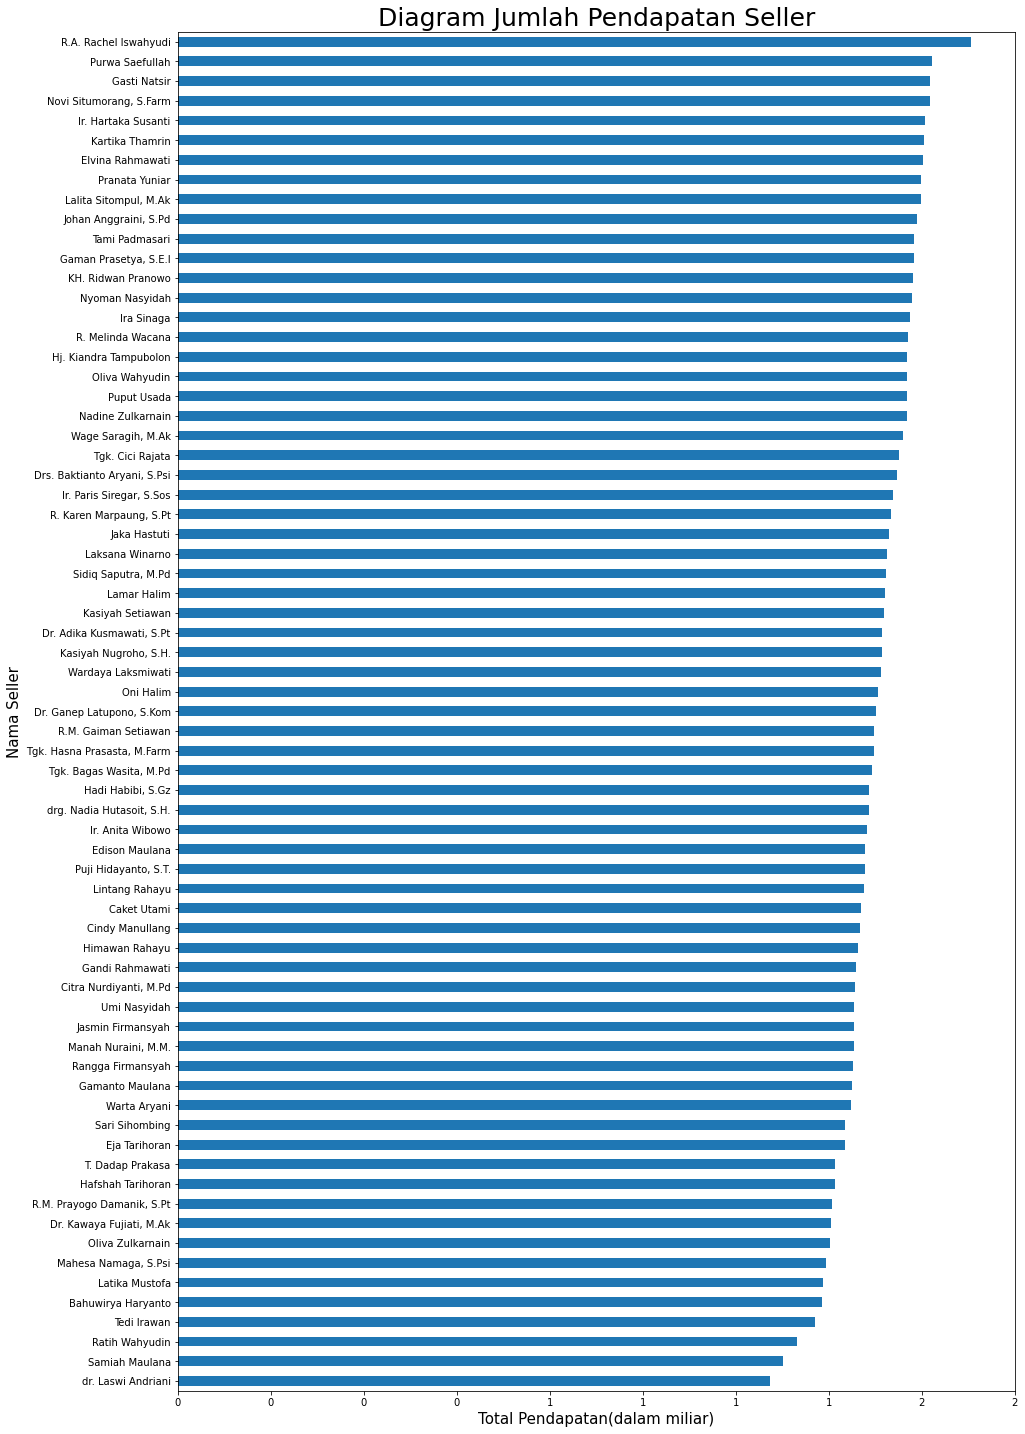

In [46]:
plt.figure(figsize=(15,25))
seller_details.groupby('nama_user')['jumlah'].sum().sort_values().plot(kind='barh')
plt.title('Diagram Jumlah Pendapatan Seller', fontsize=25)
plt.xlabel('Total Pendapatan(dalam miliar)', fontsize=15)
plt.ylabel('Nama Seller', fontsize=15)
labels,locations = plt.xticks()
plt.xticks(labels,(labels/1000000000).astype(int))
plt.show()

In [47]:
monthly_orders = (orders[['paid_at', 'total']]).copy()

In [48]:
import datetime

In [49]:
monthly_orders['paid_at'] = monthly_orders['paid_at'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m'))

In [50]:
monthly_orders = monthly_orders.groupby('paid_at')['total'].sum()
monthly_orders

paid_at
2019-01       66230000
2019-02      231206350
2019-03      525787700
2019-04      803406350
2019-05     1248989900
2019-06     1710903250
2019-07     2474019650
2019-08     3374527050
2019-09     4647754400
2019-10     6515521650
2019-11     9213578950
2019-12    13854858100
2020-01    10348060950
2020-02    10161343400
2020-03    13990115250
2020-04    17274862050
2020-05    24212015500
2020-06     8815835600
Name: total, dtype: int64

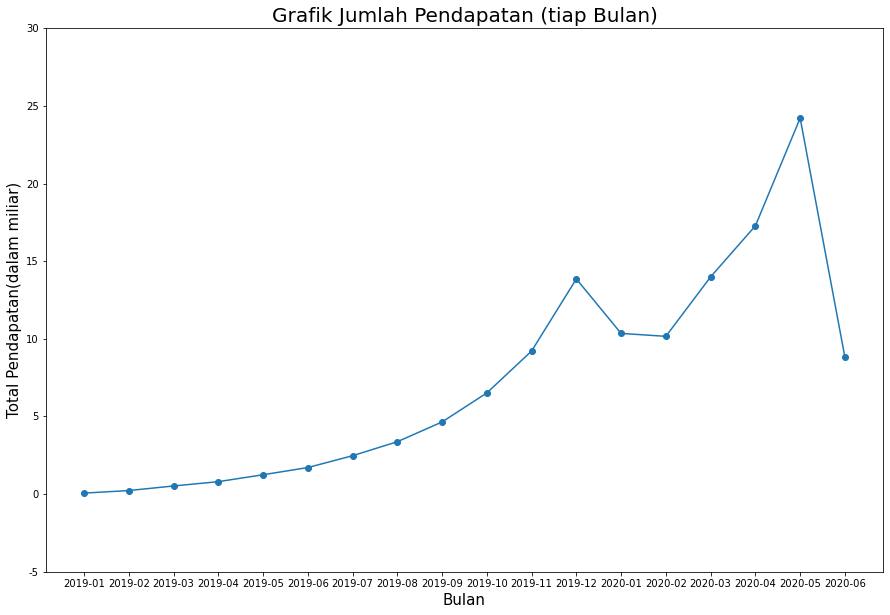

In [51]:
plt.figure(figsize=(15,10))
plt.plot(monthly_orders,marker='o')
plt.title('Grafik Jumlah Pendapatan (tiap Bulan)', fontsize=20)
plt.xlabel('Bulan', fontsize=15)
plt.ylabel('Total Pendapatan(dalam miliar)', fontsize=15)
labels,locations = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.show()

In [52]:
product_details = pd.merge(details, products, how='right', left_on='product_id',right_on='product_id')

In [53]:
del (product_details['price'])

In [54]:
product_details['total'] = product_details['quantity']*product_details['base_price']

In [55]:
product_details

,order_detail_id,order_id,product_id,quantity,desc_product,category,base_price,total
0,11745,3297,1,36,OLIVIA KULOT OLV03,Pakaian Wanita,110000,3960000
1,16901,4699,1,11,OLIVIA KULOT OLV03,Pakaian Wanita,110000,1210000
2,17070,4745,1,42,OLIVIA KULOT OLV03,Pakaian Wanita,110000,4620000
3,18932,5249,1,9,OLIVIA KULOT OLV03,Pakaian Wanita,110000,990000
4,21739,6037,1,12,OLIVIA KULOT OLV03,Pakaian Wanita,110000,1320000
...,...,...,...,...,...,...,...,...
187447,1776914,495326,1145,10,Original Source Body Shower Vanilla & Raspberr...,Kebersihan Diri,40000,400000
187448,1777040,495365,1145,24,Original Source Body Shower Vanilla & Raspberr...,Kebersihan Diri,40000,960000
187449,1787497,498287,1145,40,Original Source Body Shower Vanilla & Raspberr...,Kebersihan Diri,40000,1600000
187450,1787499,498287,1145,40,Original Source Body Shower Vanilla & Raspberr...,Kebersihan Diri,40000,1600000


In [56]:
product_details = product_details.set_index(['category','desc_product'])
product_details

order_detail_id  \
category        desc_product                                                          
Pakaian Wanita  OLIVIA KULOT OLV03                                            11745   
                OLIVIA KULOT OLV03                                            16901   
                OLIVIA KULOT OLV03                                            17070   
                OLIVIA KULOT OLV03                                            18932   
                OLIVIA KULOT OLV03                                            21739   
...                                                                             ...   
Kebersihan Diri Original Source Body Shower Vanilla & Raspberry...          1776914   
                Original Source Body Shower Vanilla & Raspberry...          1777040   
                Original Source Body Shower Vanilla & Raspberry...          1787497   
                Original Source Body Shower Vanilla & Raspberry...          1787499   
                Original Source Body Shower Vanilla & Raspberry...          1787817   

                                                                    order_id  \
category        desc_product                                                   
Pakaian Wanita  OLIVIA KULOT OLV03                                      3297   
                OLIVIA KULOT OLV03                                      4699   
                OLIVIA KULOT OLV03                                      4745   
                OLIVIA KULOT OLV03                                      5249   
                OLIVIA KULOT OLV03                                      6037   
...                                                                      ...   
Kebersihan Diri Original Source Body Shower Vanilla & Raspberry...    495326   
                Original Source Body Shower Vanilla & Raspberry...    495365   
                Original Source Body Shower Vanilla & Raspberry...    498287   
                Original Source Body Shower Vanilla & Raspberry...    498287   
                Original Source Body Shower Vanilla & Raspberry...    498383   

                                                                    product_id  \
category        desc_product                                                     
Pakaian Wanita  OLIVIA KULOT OLV03                                           1   
                OLIVIA KULOT OLV03                                           1   
                OLIVIA KULOT OLV03                                           1   
                OLIVIA KULOT OLV03                                           1   
                OLIVIA KULOT OLV03                                           1   
...                                                                        ...   
Kebersihan Diri Original Source Body Shower Vanilla & Raspberry...        1145   
                Original Source Body Shower Vanilla & Raspberry...        1145   
                Original Source Body Shower Vanilla & Raspberry...        1145   
                Original Source Body Shower Vanilla & Raspberry...        1145   
                Original Source Body Shower Vanilla & Raspberry...        1145   

                                                                    quantity  \
category        desc_product                                                   
Pakaian Wanita  OLIVIA KULOT OLV03                                        36   
                OLIVIA KULOT OLV03                                        11   
                OLIVIA KULOT OLV03                                        42   
                OLIVIA KULOT OLV03                                         9   
                OLIVIA KULOT OLV03                                        12   
...                                                                      ...   
Kebersihan Diri Original Source Body Shower Vanilla & Raspberry...        10   
                Original Source Body Shower Vanilla & Raspberry...        24   
                Original Sou

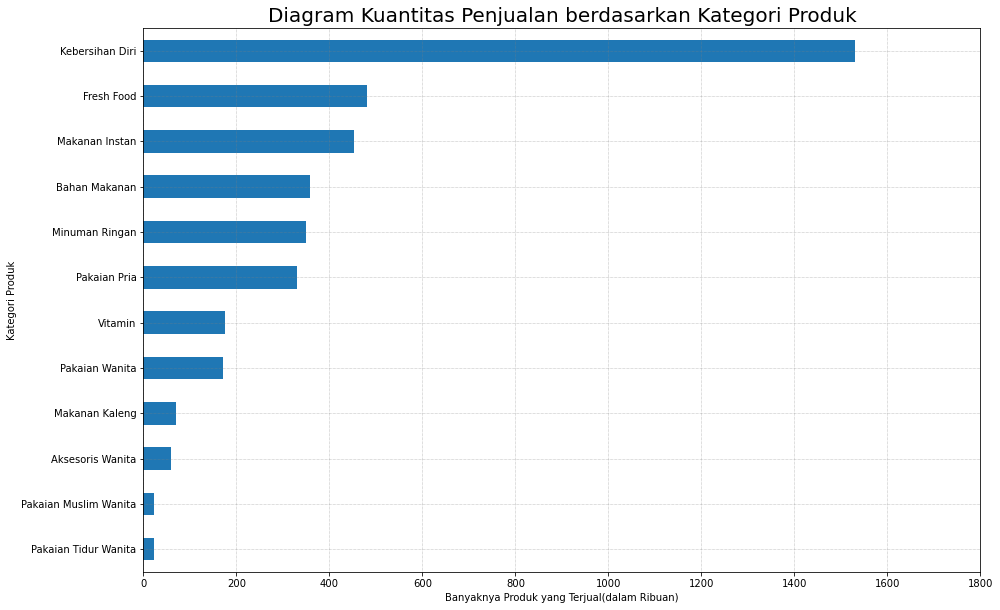

In [57]:
plt.figure(figsize=(15,10))
product_details.groupby('category')['quantity'].sum().sort_values().plot(kind='barh')
plt.title('Diagram Kuantitas Penjualan berdasarkan Kategori Produk', fontsize=20)
plt.xlabel('Banyaknya Produk yang Terjual(dalam Ribuan)', fontsize=10)
plt.ylabel('Kategori Produk', fontsize=10)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000).astype(int))
plt.grid(linestyle=':',linewidth=0.5,color='gray')
plt.show()

In [58]:
product_details.groupby('category')['quantity'].sum().sort_values(ascending=False)

category
Kebersihan Diri          1529986
Fresh Food                481716
Makanan Instan            452330
Bahan Makanan             358630
Minuman Ringan            349591
Pakaian Pria              329232
Vitamin                   176180
Pakaian Wanita            171274
Makanan Kaleng             70634
Aksesoris Wanita           58909
Pakaian Muslim Wanita      23678
Pakaian Tidur Wanita       22856
Name: quantity, dtype: int64

In [59]:
buyers_error = unfinished_transactions.loc[unfinished_transactions['paid_at'].isnull()].copy()
buyers_error

,order_id,seller_id,buyer_id,kodepos,subtotal,discount,total,created_at,paid_at,delivery_at
3,19,5,3831,91235,"1,074,000",0,1074000,16-05-20,NaN,NaN
47,320,16,17885,24758,"57,000",0,57000,07-12-19,NaN,NaN
53,350,14,3382,16833,"1,170,000",0,1170000,08-08-19,NaN,NaN
92,598,15,8601,23151,"3,870,000",0,3870000,03-04-20,NaN,NaN
104,706,33,582,60829,"1,005,000",0,1005000,14-02-20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
74831,498550,55,13058,51332,"192,000",0,192000,22-11-19,NaN,NaN
74847,498618,5,8179,83596,"49,000",0,49000,09-11-19,NaN,NaN
74851,498639,4,7281,94569,"1,386,000",0,1386000,01-04-20,NaN,NaN
74858,498697,11,16638,37064,"943,000",0,943000,14-05-20,NaN,NaN


In [60]:
sellers_error = unfinished_transactions.loc[unfinished_transactions['paid_at'].notnull()].copy()
sellers_error

,order_id,seller_id,buyer_id,kodepos,subtotal,discount,total,created_at,paid_at,delivery_at
21,135,51,2716,12436,"5,156,000",0,5156000,05-11-19,19-11-19,NaN
91,590,6,15737,24121,"346,000",0,346000,15-12-19,19-12-19,NaN
103,704,52,9310,96996,"869,000",0,869000,23-08-19,26-08-19,NaN
116,779,46,13284,67138,"2,872,000",0,2872000,17-02-20,26-02-20,NaN
117,781,16,9029,41944,"6,758,000",0,6758000,22-05-20,28-05-20,NaN
...,...,...,...,...,...,...,...,...,...,...
74782,498318,58,17289,76912,"1,800,000",0,1800000,21-03-20,31-03-20,NaN
74785,498332,59,10899,93685,"66,000",0,66000,18-08-19,22-08-19,NaN
74790,498358,18,12413,60977,"6,662,000",176800,6485200,15-03-20,23-03-20,NaN
74806,498418,16,16700,84017,"2,441,000",17550,2423450,21-05-20,30-05-20,NaN


In [61]:
sellers_error['paid_at'] = pd.to_datetime(sellers_error['paid_at'], format='%d-%m-%y')
sellers_error['created_at'] = pd.to_datetime(sellers_error['created_at'], format='%d-%m-%y')
sellers_error['gap'] = (sellers_error['paid_at'] - sellers_error['created_at']).astype(str)
sellers_error['gap'] = (sellers_error['gap'].map(lambda x: x[:-5])).astype(int)

In [62]:
note = []
for i in sellers_error['gap']:
    if i > 3:
        note.append('invalid')
    else:
        note.append('valid')

In [63]:
sellers_error.insert(10,'note',note)

In [64]:
sellers_error

,order_id,seller_id,buyer_id,kodepos,subtotal,discount,total,created_at,paid_at,delivery_at,note,gap
21,135,51,2716,12436,"5,156,000",0,5156000,2019-11-05,2019-11-19,NaN,invalid,14
91,590,6,15737,24121,"346,000",0,346000,2019-12-15,2019-12-19,NaN,invalid,4
103,704,52,9310,96996,"869,000",0,869000,2019-08-23,2019-08-26,NaN,valid,3
116,779,46,13284,67138,"2,872,000",0,2872000,2020-02-17,2020-02-26,NaN,invalid,9
117,781,16,9029,41944,"6,758,000",0,6758000,2020-05-22,2020-05-28,NaN,invalid,6
...,...,...,...,...,...,...,...,...,...,...,...,...
74782,498318,58,17289,76912,"1,800,000",0,1800000,2020-03-21,2020-03-31,NaN,invalid,10
74785,498332,59,10899,93685,"66,000",0,66000,2019-08-18,2019-08-22,NaN,invalid,4
74790,498358,18,12413,60977,"6,662,000",176800,6485200,2020-03-15,2020-03-23,NaN,invalid,8
74806,498418,16,16700,84017,"2,441,000",17550,2423450,2020-05-21,2020-05-30,NaN,invalid,9


In [65]:
(sellers_error.loc[sellers_error['note'] == 'valid']).shape

(1064, 12)

In [66]:
(sellers_error.loc[sellers_error['note'] == 'invalid']).shape

(3680, 12)

## CONCLUSION

##### 1. Terdapat 17.936 user yang terdaftar di dalam sistem pencatatan e-commerce. Dengan rincian 69 user adalah seller dan 17.877 user adalah buyer (69 seller juga termasuk buyer) serta ada 59 user yang terdaftar sebagai user tetapi belum melakukan transaksi.

##### 2. Buyer dengan frekuensi belanja paling banyak adalah Yessi Wibisono(user_id 12476) sebanyak 12 kali. Sedangkan buyer dengan nilai transaksi tertinggi adalah Jaga Puspasari(user_id 14411) sejumlah Rp 54.102.250.

##### 3. Seller dengan transaksi paling banyak adalah Gaman Prasetya(user_id 26) sebanyak 1024 kali. Sedangkan seller dengan nilai transaksi tertinggi adalah R.A Rachel Iswahyudi(user_id 40) sejumlah Rp 2.132.043.900.

##### 4. Berdasarkan volume penjualannya, produk dengan kategori Kebersihan Diri terjual sebanyak 1.529.986pcs, Fresh Food sebanyak 481.716, Makanan Instan sebanyak 452.330, Bahan Makanan sebanyak 358.630, Minuman Ringan sebanyak 349.591, Pakaian Pria sebanyak 329.232, Vitamin sebanyak 176.180, Pakaian Wanita sebanyak 171274, Makanan Kaleng sebanyak 70.634, Aksesoris Wanita sebanyak 58909, Pakaian Muslim Wanita sebanyak 23.678, serta Pakaian Tidur Wanita sebanyak 22.856.

In [ ]:
orders.total.sum()

In [ ]:
orders.total.count()

##### 5. Total uang yang mengalir dalam transaksi adalah sebesar Rp 129.469.016.100 dengan jumlah transaksi sebanyak 65.084 kali transaksi.

##### 6. Melihat data transaksi bulanan, jumlah uang yang mengalir setiap bulannya dari periode Januari 2019 hingga Juni 2020 cenderung fluktuatif. Dari yang awalnya puluhan juta di periode pertama lalu menuju titik tertinggi pertama pada Desember 2019 dengan total Rp 13.854.858.100. Sempat mengalami penurunan di momen pergantian tahun menjadi Rp 10.348.060.950, perlahan grafik menunjukkan peningkatan kembali sampai menyentuh titik tertinggi yaitu Rp 24.212.015.500 pada Mei 2020. Namun setelahnya, nilai transaksi menurun tajam hingga hampir 3 kali lipat di angka Rp 8.815.835.600 pada bulan Juni 2020.

##### 7. Ada kurang lebih 9.790 transaksi yang tidak terselesaikan dikarenakan tidak adanya pembayaran maupun tidak adanya pengantaran pesanan ke pelanggan. Transaksi bermasalah ini dikelompokkan menjadi buyer error maupun seller error. Buyer error terjadi jika buyer sudah melakukan transaksi yang dibuktikan dengan adanya data pada tabel 'orders' di kolom 'created_at' yang sudah tercatat tanggalnya, namun tidak ditindaklanjuti dengan pembayaran yang dibuktikan dengan kolom 'paid_at' berisi NaN atau data tidak ada. Sementara itu, untuk seller error terjadi jika buyer sudah membuat pesanan dan telah membayar tetapi kolom 'delivery_at' berisi NaN atau tidak ada data, yang berarti seller belum melakukan pengantara pesanan kepada pelanggan. Namun untuk jenis error ini diberlakukan catatan khusus. Jika jarak waktu antara 'paid_at' dan 'created_at' lebih dari 3 hari, maka ini bukanlah kesalahan seller. Karena menurut peraturan, proses pembayaran harus dilakukan selambat-lambatnya 3x24 jam.

##### 8. Dari 9.790 error tadi 5.046 termasuk ke dalam buyer error. Sedangkan 4.744 yang awalnya dikelompokkan ke dalam seller error, setelah dilakukan inspeksi, ternyata hanya 1.064 error yang memang dilakukan oleh seller yaitu pengabaian tanggung jawab dan 3.680 error lainnya adalah kesalahan buyer yang tidak mematuhi aturan batas akhir pembayaran pesanan.